In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('dataset/Online_casino_DIB.csv')

In [3]:
df1 = pd.read_csv('dataset/Online_sports_DIB.csv')

In [4]:
df.head(5)

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier
0,2019-07-05T05:02:28+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
1,2019-07-05T05:26:00+0000,LOYALTYCARDDEBIT,10.0,APPROVED,customer1734
2,2019-07-05T04:54:35+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
3,2019-07-05T05:02:27+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734
4,2019-07-05T05:25:59+0000,LOYALTYCARDCREDITCL,10.0,APPROVED,customer1734


In [5]:
df.isna().sum()

ReqTimeUTC           0
TransactionType      0
TransactionAmount    0
Status               0
AccountIdentifier    0
dtype: int64

In [6]:
df.ReqTimeUTC = pd.to_datetime(df.ReqTimeUTC)

In [7]:
df.describe(exclude = np.number)

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,138928,138928,138928,138928
unique,NaN,3,2,2361
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,70329,133520,2318
mean,2019-08-23 14:37:01.511898112+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-19 06:27:26.249999872+00:00,NaN,NaN,NaN
50%,2019-08-21 13:32:02.500000+00:00,NaN,NaN,NaN
75%,2019-11-23 20:28:33.500000+00:00,NaN,NaN,NaN
max,2020-03-02 07:47:06+00:00,NaN,NaN,NaN


In [8]:
df.ReqTimeUTC > '2020-03-02 07:47:06+00:00'

0         False
1         False
2         False
3         False
4         False
          ...  
138923    False
138924    False
138925    False
138926    False
138927    False
Name: ReqTimeUTC, Length: 138928, dtype: bool

In [9]:
df = df[df.ReqTimeUTC <= '2020-02-29 00:00:00+00:00'].copy()

In [10]:
df.describe(exclude = 'float64')

,ReqTimeUTC,TransactionType,Status,AccountIdentifier
count,137857,137857,137857,137857
unique,NaN,3,2,2351
top,NaN,LOYALTYCARDDEBIT,APPROVED,customer10
freq,NaN,69795,132473,2294
mean,2019-08-22 03:05:44.556649216+00:00,NaN,NaN,NaN
min,2019-03-01 08:03:23+00:00,NaN,NaN,NaN
25%,2019-05-18 13:13:36+00:00,NaN,NaN,NaN
50%,2019-08-20 03:04:39+00:00,NaN,NaN,NaN
75%,2019-11-21 13:40:41+00:00,NaN,NaN,NaN
max,2020-02-28 23:54:14+00:00,NaN,NaN,NaN


In [11]:
df.TransactionType.unique()

array(['LOYALTYCARDDEBIT', 'LOYALTYCARDCREDITCL', 'LOYALTYCARDCREDIT'],
      dtype=object)

In [12]:
df.Status.unique()

array(['APPROVED', 'DECLINED'], dtype=object)

In [13]:
usertype = df.groupby(['AccountIdentifier','TransactionType']).count().reset_index()


In [14]:
usertype

,AccountIdentifier,TransactionType,ReqTimeUTC,TransactionAmount,Status
0,customer1,LOYALTYCARDCREDIT,2,2,2
1,customer1,LOYALTYCARDCREDITCL,438,438,438
2,customer1,LOYALTYCARDDEBIT,444,444,444
3,customer10,LOYALTYCARDCREDITCL,1164,1164,1164
4,customer10,LOYALTYCARDDEBIT,1130,1130,1130
...,...,...,...,...,...
4984,customer997,LOYALTYCARDDEBIT,1,1,1
4985,customer998,LOYALTYCARDCREDITCL,2,2,2
4986,customer998,LOYALTYCARDDEBIT,2,2,2
4987,customer999,LOYALTYCARDCREDITCL,2,2,2


<Axes: xlabel='ReqTimeUTC', ylabel='Density'>

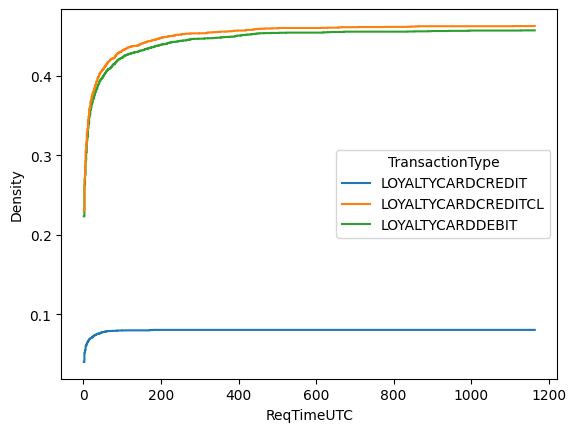

In [15]:
sns.histplot( data = usertype , x = 'ReqTimeUTC' , hue = 'TransactionType' , cumulative = True , stat = 'density', element = 'step', fill = False)

In [16]:
df.TransactionType = df.TransactionType.map({'LOYALTYCARDDEBIT':'L2D', 'LOYALTYCARDCREDITCL':'L1D', 'LOYALTYCARDCREDIT':'L2W'})

In [17]:
top20_freq = df.groupby('AccountIdentifier').count().reset_index().iloc[:,0:2].sort_values('ReqTimeUTC')[::-1][0:20]
top20_spend = df[['AccountIdentifier','TransactionAmount']].groupby('AccountIdentifier').sum().reset_index().sort_values('TransactionAmount')[::-1][0:20]


Text(0.5, 1.0, 'Top 20 Frequency Spender')

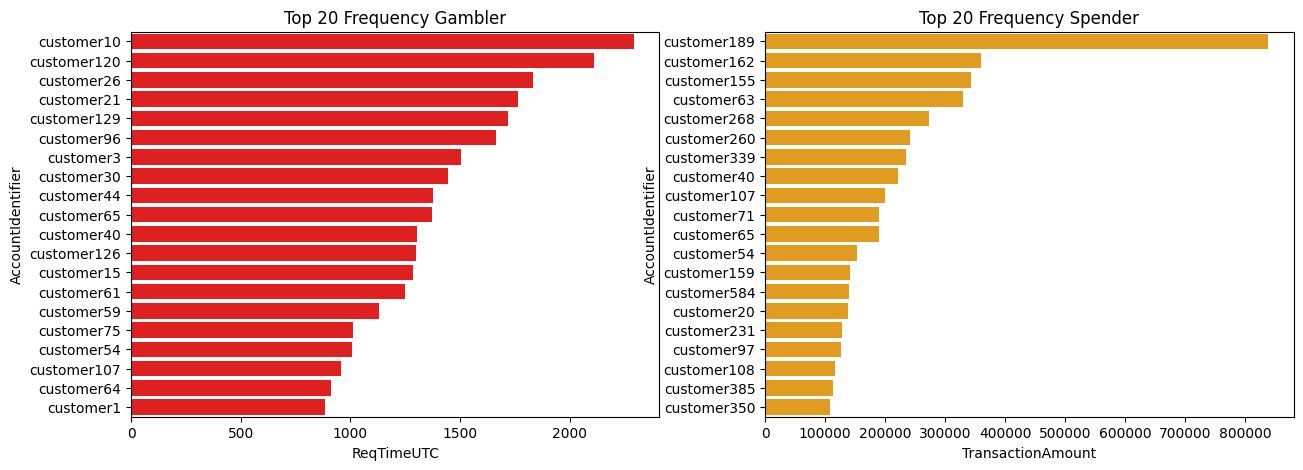

In [18]:
fig ,ax = plt.subplots(ncols =2 , figsize = (15,5) )
sns.barplot(top20_freq , x = 'ReqTimeUTC' , y = 'AccountIdentifier' , ax = ax[0] , color = 'red')
ax[0].set_title('Top 20 Frequency Gambler')
sns.barplot(top20_spend , x = 'TransactionAmount' , y ='AccountIdentifier' , ax = ax[1] , color = 'orange')
ax[1].set_title('Top 20 Frequency Spender')

In [19]:
df['Hour'] = df.ReqTimeUTC.dt.hour
df['Day_of_week'] = df.ReqTimeUTC.dt.day_of_week

In [20]:
Day_of_week_dic = { 0:'Monday',
                   1:'Tueday',
                   3:'Wednesday',
                   4:'Thursday',
                   5:'Friday',
                   6:'Saturday',
                   7:'Sunday'}
df['Day_of_week'] = df['Day_of_week'].map(Day_of_week_dic)

In [21]:
df.head(2)

,ReqTimeUTC,TransactionType,TransactionAmount,Status,AccountIdentifier,Hour,Day_of_week
0,2019-07-05 05:02:28+00:00,L2D,10.0,APPROVED,customer1734,5,Thursday
1,2019-07-05 05:26:00+00:00,L2D,10.0,APPROVED,customer1734,5,Thursday


In [22]:
h_d_t = df[['Hour','Day_of_week','TransactionType']].groupby(['Hour','Day_of_week']).count().reset_index()
casino_dt = pd.pivot_table( h_d_t , values = 'TransactionType' , index = 'Day_of_week' , columns = 'Hour')


<Axes: xlabel='Hour', ylabel='Day_of_week'>

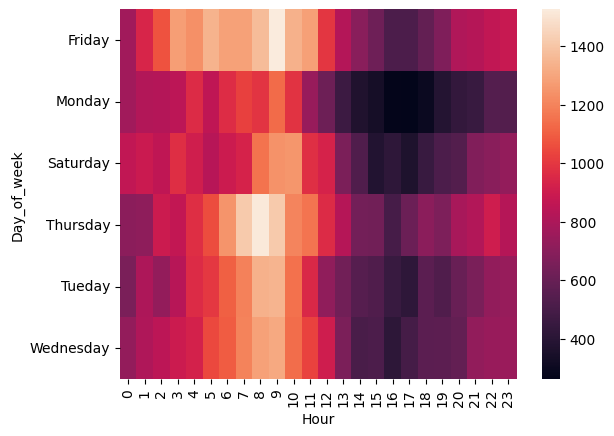

In [23]:
sns.heatmap(casino_dt)

In [24]:
df['ReqTimeUTC'] = df['ReqTimeUTC'].dt.to_period('D')

C:\Users\seyhak jr\AppData\Local\Temp\ipykernel_20232\2807622588.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['ReqTimeUTC'] = df['ReqTimeUTC'].dt.to_period('D')


In [25]:
daily_activity = df.groupby(['ReqTimeUTC','AccountIdentifier']).agg({
    'TransactionType':'count',
    'TransactionAmount':'sum'
}).reset_index()
daily_activity

,ReqTimeUTC,AccountIdentifier,TransactionType,TransactionAmount
0,2019-03-01,customer1,6,240.00
1,2019-03-01,customer102,14,240.00
2,2019-03-01,customer1040,2,20.00
3,2019-03-01,customer105,4,300.00
4,2019-03-01,customer1055,2,100.00
...,...,...,...,...
30575,2020-02-28,customer96,9,151.93
30576,2020-02-28,customer966,4,400.00
30577,2020-02-28,customer971,6,280.00
30578,2020-02-28,customer99,10,330.00


In [46]:
customer_df = daily_activity[daily_activity.AccountIdentifier == 'customer1'] 
# full_range = pd.date_range(customer_df.ReqTimeUTC.min().to_timestamp() , customer_df.ReqTimeUTC.max().to_timestamp() , freq = 'D')
# customer_df = customer_df.set_index('ReqTimeUTC')
# customer_df = customer_df.reindex(list('full_range') , fill_value = 0)
customer_df.head(5)

,ReqTimeUTC,AccountIdentifier,TransactionType,TransactionAmount
0,2019-03-01,customer1,6,240.0
102,2019-03-02,customer1,4,250.0
266,2019-03-03,customer1,4,400.0
409,2019-03-04,customer1,6,320.0
515,2019-03-05,customer1,6,480.0


In [45]:
daily_activity.isna().sum()

ReqTimeUTC           0
AccountIdentifier    0
TransactionType      0
TransactionAmount    0
dtype: int64

In [59]:
c1 = daily_activity[daily_activity.AccountIdentifier=="customer1"][0:20]
c1['ReqTimeUTC'] = c1['ReqTimeUTC'].dt.to_timestamp()

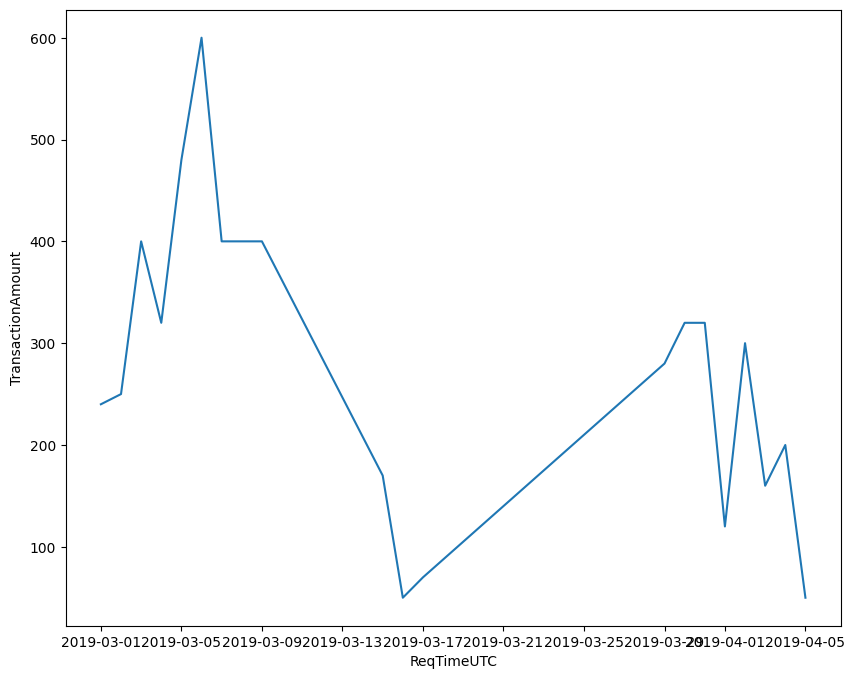

In [64]:
plt.figure(figsize=(10,8))
sns.lineplot(data=c1, x='ReqTimeUTC', y='TransactionAmount')
plt.show()


In [75]:
daily_activity['Month'] = daily_activity['ReqTimeUTC'].dt.asfreq('M')
customer_month = daily_activity.groupby(['Month','AccountIdentifier']).count().reset_index().iloc[:,0:2]
start_date = customer_month.groupby('AccountIdentifier').min().reset_index()
end_date = customer_month.groupby('AccountIdentifier').max().reset_index()
start_end = pd.merge(start_date , end_date , on = 'AccountIdentifier')




In [84]:
num_date = start_end.groupby(['Month_x','Month_y']).count().reset_index()
num_date.iloc[0:2]

,Month_x,Month_y,AccountIdentifier
0,2019-03,2019-03,279
1,2019-03,2019-04,60


In [95]:
fast_quiter = num_date[ num_date.Month_x == num_date.Month_y ]
soure_target =  num_date[ num_date.Month_x != num_date.Month_y ]

In [96]:
fast_quiter.head(2)

,Month_x,Month_y,AccountIdentifier
0,2019-03,2019-03,279
12,2019-04,2019-04,90


In [90]:
soure_target.head(2)

,Month_x,Month_y,AccountIdentifier
1,2019-03,2019-04,60
2,2019-03,2019-05,47


Total of Customer who deposit money in every month

In [100]:
tc_df = customer_month.groupby('Month').count().reset_index()
tc_df.head(2)

,Month,AccountIdentifier
0,2019-03,768
1,2019-04,576


Total of Customer who deposit money in one month

In [99]:
fq_df = fast_quiter[["Month_x", "AccountIdentifier"]]
fq_df.head(2)

,Month_x,AccountIdentifier
0,2019-03,279
12,2019-04,90


In [105]:
q_t = pd.merge(tc_df , fq_df , right_on = 'Month_x' , left_on = 'Month')[['AccountIdentifier_x','Month','AccountIdentifier_y']]
q_t.rename( columns = {'Month':'Month','AccountIdentifier_x':'Total', 'AccountIdentifier_y':'Quit'} , inplace = True)
q_t

,Total,Month,Quit
0,768,2019-03,279
1,576,2019-04,90
2,579,2019-05,99
3,545,2019-06,81
4,540,2019-07,96
5,500,2019-08,85
6,464,2019-09,71
7,463,2019-10,67
8,458,2019-11,68
9,488,2019-12,92


In [111]:
monthly_customer = q_t.melt(id_vars = 'Month').rename(columns = {'variable':'Customer','value':'Number of Customer'})
monthly_customer.head(5)

,Month,Customer,Number of Customer
0,2019-03,Total,768
1,2019-04,Total,576
2,2019-05,Total,579
3,2019-06,Total,545
4,2019-07,Total,540


Text(0, 0.5, 'The Number Of Customer')

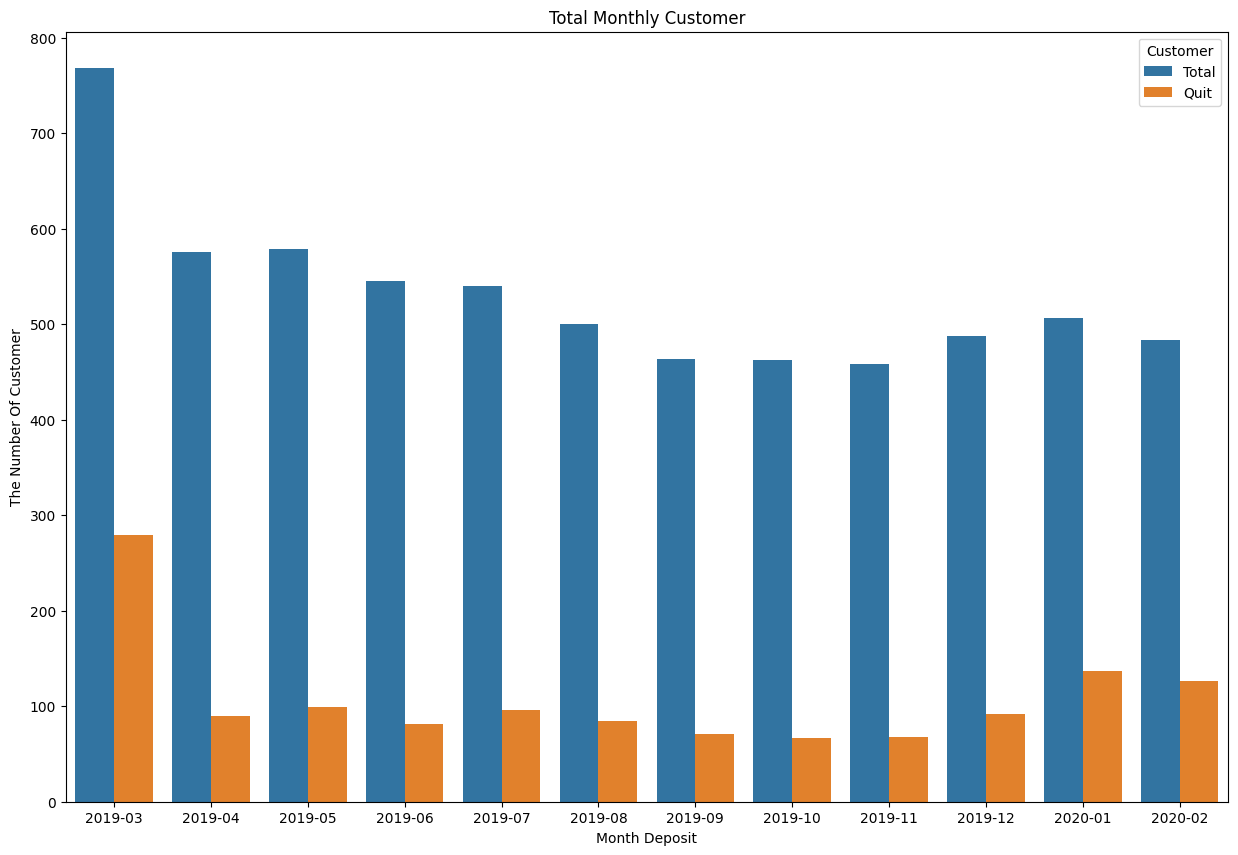

In [112]:
plt.figure(figsize=(15,10))
sns.barplot( monthly_customer , x = 'Month' , y = 'Number of Customer' , hue = 'Customer')
plt.title('Total Monthly Customer')
plt.xlabel('Month Deposit')
plt.ylabel('The Number Of Customer')